Montar el drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import librosa
from librosa import display
#data de ejemplo
data, sampling_rate = librosa.load('/content/drive/Shareddrives/DSN-Tesis-1/EmoFilm/wav_corpus/m_tri039aes.wav')
#data, sampling_rate = librosa.load('/content/drive/MyDrive/2020-2/DL/RAVDESS/Audio_Song_Actors_01-24/Actor_01/03-02-01-01-01-01-01.wav')

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['display']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


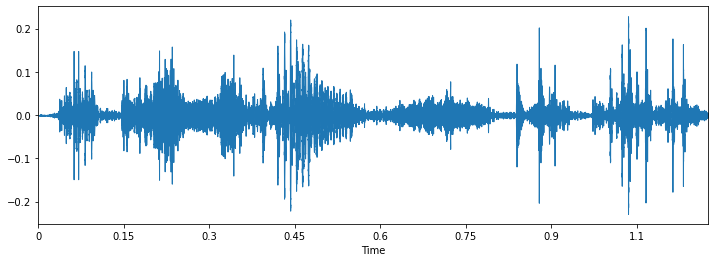

In [ ]:
% pylab inline
import os
import pandas as pd
import glob 

plt.figure(figsize=(12, 4))
librosa.display.waveplot(data, sr=sampling_rate)

Ejemplo de un MFCC y su espectograma

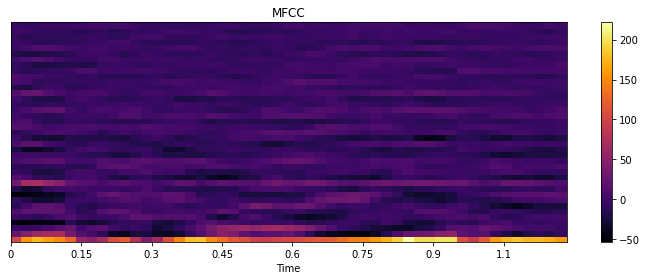

In [ ]:
mfcc1 = librosa.feature.mfcc(data,sampling_rate,n_mfcc = 40)
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfcc1[1:40], x_axis='time', cmap = 'inferno')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()
plt.show();

Creando carpeta para guardar espectogramas

In [ ]:
os.mkdir('/content/drive/Shareddrives/DSN-Tesis-1/EmoFilm/imgs2')

FileExistsError: ignored

In [ ]:
import librosa.display
import matplotlib.pyplot as plt

Cargar la bd con las 5 emociones (Espectogramas y mfccs)

In [ ]:
import time

path = '/content/drive/Shareddrives/DSN-Tesis-1/EmoFilm/wav_corpus'
lst = []
lst_spec = []
melspecto = []
start_time = time.time()
for subdir, dirs, files in os.walk(path):
  for file in files:
    try:
      filex = str(file[9:11])
      #print (filex)
      if filex == "es":
        #EXTRACCION DE CARACTERISTICAS
        X, sample_rate = librosa.load(os.path.join(subdir,file), res_type='kaiser_fast')
        #mfcss
        mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis = 0)
        mel_spectogram = librosa.feature.melspectrogram(y=X, sr=sample_rate, n_mels=40)
        #mel_spectogram = librosa.feature.melspectrogram(y=X, sr=sample_rate)
        mel_db = librosa.power_to_db(mel_spectogram, ref=np.max)
        mel_dbshaped = mel_db.reshape(-1,1)
        spec = mel_db.T
        melspecto.append(mel_dbshaped)
        filelabel = str(file[2:5])
        if filelabel == "ans":
          filelabel = 0
        elif filelabel == "dis":
          filelabel = 1
        elif filelabel == "gio":
          filelabel = 2
        elif filelabel == "rab":
          filelabel = 3
        else:
          filelabel = 4
        #print(file)
        #mostrar los spectogramas y guardarlos
        fig = plt.figure(figsize=[0.72,0.72])
        librosa.display.specshow(mel_db)
        fig.savefig( os.path.join('/content/drive/Shareddrives/DSN-Tesis-1/EmoFilm/imgs2',str(filelabel),str(file[:-3])) +'jpg' , dpi=400, bbox_inches='tight',pad_inches=0)
        plt.close()
        fig.clf()
        plt.close(fig)
        plt.close('all')
        arr = mfccs, filelabel
        arr2 = spec
        lst.append(arr)
        lst_spec.append(mel_db)
      else:
        pass
    except ValueError:
      continue
print("--- Data cargada. Tiempo de carga: %s segundos ---" % (time.time() - start_time))


--- Data cargada. Tiempo de carga: 58.50359058380127 segundos ---


CARGAR LA BD CON SOLO 2 EMOCIONES (POSITIVO-NEGATIVO)

In [ ]:
import time

path = '/content/drive/Shareddrives/DSN-Tesis-1/EmoFilm/wav_corpus'
lst = []
lst_spec = []
melspecto = []
start_time = time.time()
for subdir, dirs, files in os.walk(path):
  for file in files:
    try:
      filex = str(file[9:11])
      #print (filex)
      if filex == "es":
        X, sample_rate = librosa.load(os.path.join(subdir,file), res_type='kaiser_fast')
        mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis = 0)
        mel_spectogram = librosa.feature.melspectrogram(y=X, sr=sample_rate, n_mels=40)
        #mel_spectogram = librosa.feature.melspectrogram(y=X, sr=sample_rate)
        mel_db = librosa.power_to_db(mel_spectogram, ref=np.max)
        mel_dbshaped = mel_db.reshape(-1,1)
        spec = mel_db.T
        melspecto.append(mel_dbshaped[:54656]])
        file = str(file[2:5])
        if file != "gio":
          file = 0
        else:
          file = 1
        #+print(file)
        arr = mfccs, file
        arr2 = spec
        lst.append(arr)
        lst_spec.append(mel_db)
      else:
        pass
    except ValueError:
      continue
print("--- Data cargada. Tiempo de carga: %s segundos ---" % (time.time() - start_time))


--- Data cargada. Tiempo de carga: 19.993394374847412 segundos ---


# **Proceso CON los Espectogramas**

In [ ]:
path_img = '/content/drive/Shareddrives/DSN-Tesis-1/EmoFilm/imgs2'

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

imageDataGen = ImageDataGenerator(rescale=1.0/255)
img_gen = imageDataGen.flow_from_directory(
    path_img,
    target_size=(100,100),
    class_mode = 'categorical',
    batch_size = 128
)

Found 359 images belonging to 5 classes.


In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2) # set validation split

train_generator = train_datagen.flow_from_directory(
    path_img,
    target_size=(100,100),
    class_mode='categorical',
    subset='training') # set as training data

validation_generator = train_datagen.flow_from_directory(
    path_img, # same directory as training data
    target_size=(100,100),
    class_mode='categorical',
    subset='validation') # set as validation data

Found 289 images belonging to 5 classes.
Found 70 images belonging to 5 classes.


In [ ]:
# Importing keras 
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from keras.models import Sequential

In [ ]:
# CNN
model = Sequential([
    Conv2D(64,(4,4),activation='relu',input_shape = (100,100,3) ),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(1024,activation='relu'),
    Dense(512,activation='relu'),
    Dense(5,activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']  )
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 97, 97, 64)        3136      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 48, 48, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 147456)            0         
_________________________________________________________________
dense (Dense)                (None, 1024)              150995968 
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 2565      
Total params: 151,526,469
Trainable params: 151,526,469
Non-trainable params: 0
__________________________________________

In [ ]:
# Fitting training data into model
historycnn = model.fit_generator(img_gen,epochs=50)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
3/3 [==============================] - 114s 54s/step - loss: 25.8075 - accuracy: 0.2201
Epoch 2/50
3/3 [==============================] - 11s 4s/step - loss: 13.0589 - accuracy: 0.1811
Epoch 3/50
3/3 [==============================] - 11s 3s/step - loss: 5.0082 - accuracy: 0.1894
Epoch 4/50
3/3 [==============================] - 11s 3s/step - loss: 2.5363 - accuracy: 0.2340
Epoch 5/50
3/3 [==============================] - 14s 4s/step - loss: 1.7466 - accuracy: 0.2340
Epoch 6/50
3/3 [==============================] - 13s 3s/step - loss: 1.6129 - accuracy: 0.1894
Epoch 7/50
3/3 [==============================] - 12s 3s/step - loss: 1.5537 - accuracy: 0.3370
Epoch 8/50
3/3 [==============================] - 13s 4s/step - loss: 1.4904 - accuracy: 0.4429
Epoch 9/50
3/3 [==============================] - 13s 5s/step - loss: 1.4027 - accuracy: 0.4652
Epoch 10/50
3/3 [==============================] - 12s 4s/step - loss: 1.2998 - accuracy: 0.5320
Epoch 11/50
3/3 [==================

In [ ]:
model.evaluate_generator(validation_generator)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2006: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[3.320786952972412, 0.4571428596973419]

In [ ]:
predictions = model.predict_generator(validation_generator)
predicted_classes = numpy.argmax(predictions, axis=1)
true_classes = validation_generator.classes

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [ ]:
from sklearn.metrics import classification_report
report = classification_report(true_classes, predicted_classes)
print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.25      0.40      0.31        10
           2       0.10      0.13      0.11        15
           3       0.20      0.12      0.15        16
           4       0.18      0.18      0.18        17

    accuracy                           0.16        70
   macro avg       0.14      0.17      0.15        70
weighted avg       0.14      0.16      0.15        70



Ejemplo de un espectograma

Text(0.5, 1.0, 'Mel Spectrogram')

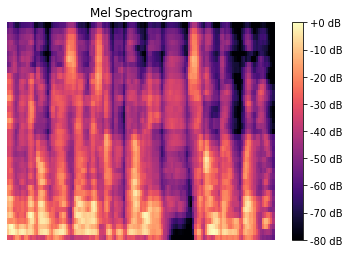

In [ ]:
plt.axis('off') # no axis
librosa.display.specshow(lst_spec[0])
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')

In [ ]:
#lst
#lst_spec

# **Proceso con MFCC**

In [ ]:
#zip dataset
X, y = zip(*lst)

In [ ]:
#!pip3 install swifter

Con Spectogramas

In [ ]:
norm = np.linalg.norm(X)
normal_array = X/norm

In [ ]:
Xstd = normal_array

In [ ]:
import numpy as np
X = np.asarray(X)
y = np.asarray(y)
Xstd = np.asarray(X)
X.shape, y.shape, Xstd.shape

((359, 39), (359,), (359, 39))

In [ ]:
len(y[(y[:] == 1)])

50

Particionando

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
from sklearn.model_selection import train_test_split

X_trains, X_tests, y_trains, y_tests = train_test_split(Xstd, y, test_size=0.33, random_state=42)

In [ ]:
Xstd.shape

(359, 39)

In [ ]:
import joblib

In [ ]:
X_name = 'X.joblib'
y_name = 'y.joblib'
dir_g = '/content/drive/Shareddrives/DSN-Tesis-1/EmoFilm'

In [ ]:
gX = joblib.dump(X, os.path.join(dir_g, X_name))
gy = joblib.dump(y, os.path.join(dir_g, y_name))

In [ ]:
X = joblib.load('/content/drive/Shareddrives/DSN-Tesis-1/EmoFilm/X.joblib')
y = joblib.load('/content/drive/Shareddrives/DSN-Tesis-1/EmoFilm/y.joblib')

In [ ]:
type(y)

numpy.ndarray

Decision tree para prueba

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
tree = DecisionTreeClassifier()

In [ ]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
preds = tree.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.32      0.45      0.38        20
           1       0.36      0.31      0.33        16
           2       0.36      0.33      0.35        27
           3       0.56      0.52      0.54        27
           4       0.67      0.62      0.64        29

    accuracy                           0.46       119
   macro avg       0.45      0.45      0.45       119
weighted avg       0.47      0.46      0.47       119



In [ ]:
tree = DecisionTreeClassifier()
tree.fit(X_trains, y_trains)
predsSTD = tree.predict(X_tests)

In [ ]:
print(classification_report(y_tests,predsSTD))

              precision    recall  f1-score   support

           0       0.40      0.60      0.48        20
           1       0.45      0.31      0.37        16
           2       0.42      0.37      0.39        27
           3       0.64      0.59      0.62        27
           4       0.66      0.66      0.66        29

    accuracy                           0.52       119
   macro avg       0.51      0.51      0.50       119
weighted avg       0.53      0.52      0.52       119



In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
RF = RandomForestClassifier(criterion="gini", max_depth=10, max_features="log2", 
                                 max_leaf_nodes = 100, min_samples_leaf = 3, min_samples_split = 20, 
                                 n_estimators= 22000, random_state= 5)

In [ ]:
RF.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='log2',
                       max_leaf_nodes=100, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, n_estimators=22000,
                       n_jobs=None, oob_score=False, random_state=5, verbose=0,
                       warm_start=False)

In [ ]:
predsRF = RF.predict(X_test)

In [ ]:
print(classification_report(y_test,predsRF))

              precision    recall  f1-score   support

           0       0.62      0.50      0.56        20
           1       1.00      0.25      0.40        16
           2       0.65      0.48      0.55        27
           3       0.59      0.96      0.73        27
           4       0.71      0.86      0.78        29

    accuracy                           0.66       119
   macro avg       0.72      0.61      0.60       119
weighted avg       0.70      0.66      0.63       119



In [ ]:
RF = RandomForestClassifier(criterion="gini", max_depth=10, max_features="log2", 
                                 max_leaf_nodes = 100, min_samples_leaf = 3, min_samples_split = 20, 
                                 n_estimators= 22000, random_state= 5)
RF.fit(X_trains, y_trains)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='log2',
                       max_leaf_nodes=100, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, n_estimators=22000,
                       n_jobs=None, oob_score=False, random_state=5, verbose=0,
                       warm_start=False)

In [ ]:
predsRFSTD = RF.predict(X_tests)

In [ ]:
print(classification_report(y_tests,predsRFSTD))

              precision    recall  f1-score   support

           0       0.62      0.50      0.56        20
           1       1.00      0.25      0.40        16
           2       0.65      0.48      0.55        27
           3       0.59      0.96      0.73        27
           4       0.71      0.86      0.78        29

    accuracy                           0.66       119
   macro avg       0.72      0.61      0.60       119
weighted avg       0.70      0.66      0.63       119



CNN + MFCCS

In [ ]:
x_traincnn = np.expand_dims(X_train, axis=2)
x_testcnn = np.expand_dims(X_test, axis=2)

In [ ]:
x_traincnn1 = np.expand_dims(X_trains, axis=2)
x_testcnn1 = np.expand_dims(X_tests, axis=2)

In [ ]:
x_traincnn1.shape, x_testcnn1.shape

((240, 39, 1), (119, 39, 1))

In [ ]:
x_traincnn.shape, x_testcnn.shape

((240, 39, 1), (119, 39, 1))

In [ ]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
#from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from keras.layers import Conv1D, MaxPooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint

CNN1

In [ ]:
model = Sequential()

model.add(Conv1D(64, 2,padding='same',
                 input_shape=(39,1)))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(2)))
model.add(Conv1D(128, 2,padding='same',))
model.add(Activation('relu'))
#model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(5))
model.add(Activation('softmax'))

CNN 2

In [ ]:
model = Sequential()

#Input Layer
model.add(Conv1D(64, 5,strides=2,padding='same',
                 input_shape=(39,1)))
model.add(Activation('relu'))
model.add(BatchNormalization())

#Hidden Layer 1
model.add(Conv1D(64, 5,strides=2,padding='same',))
model.add(Activation('relu'))
model.add(BatchNormalization())

#Hidden Layer 2
model.add(Conv1D(64, 5,strides=2,padding='same',))
model.add(Activation('relu'))
model.add(BatchNormalization())

#Flatten Conv Net
model.add(Flatten())

#Output Layer
model.add(Dense(5))
model.add(Activation('softmax'))

In [ ]:
opt = keras.optimizers.RMSprop(lr=0.0001, rho=0.9, epsilon=None, decay=0.0)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
opt = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
model.save('cnn.h5')

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_7 (Conv1D)            (None, 39, 64)            192       
_________________________________________________________________
activation_10 (Activation)   (None, 39, 64)            0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 39, 64)            0         
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 19, 64)            0         
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 19, 128)           16512     
_________________________________________________________________
activation_11 (Activation)   (None, 19, 128)           0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 2432)             

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [ ]:
cnnhistory=model.fit(x_traincnn, y_train, batch_size=16, epochs=100, validation_data=(x_testcnn, y_test))

Epoch 1/100
15/15 [==============================] - 1s 20ms/step - loss: 4.9084 - accuracy: 0.1958 - val_loss: 3.0651 - val_accuracy: 0.2521
Epoch 2/100
15/15 [==============================] - 0s 7ms/step - loss: 2.7433 - accuracy: 0.2542 - val_loss: 2.2631 - val_accuracy: 0.1681
Epoch 3/100
15/15 [==============================] - 0s 8ms/step - loss: 2.2747 - accuracy: 0.2667 - val_loss: 1.9511 - val_accuracy: 0.1933
Epoch 4/100
15/15 [==============================] - 0s 7ms/step - loss: 1.9786 - accuracy: 0.3292 - val_loss: 1.7464 - val_accuracy: 0.3109
Epoch 5/100
15/15 [==============================] - 0s 8ms/step - loss: 1.9908 - accuracy: 0.3000 - val_loss: 1.5818 - val_accuracy: 0.3697
Epoch 6/100
15/15 [==============================] - 0s 8ms/step - loss: 1.7476 - accuracy: 0.3667 - val_loss: 1.3751 - val_accuracy: 0.3697
Epoch 7/100
15/15 [==============================] - 0s 7ms/step - loss: 1.5597 - accuracy: 0.3833 - val_loss: 1.2590 - val_accuracy: 0.4538
Epoch 8/100


In [ ]:
cnnhistory=model.fit(x_traincnn1, y_trains, batch_size=16, epochs=100, validation_data=(x_testcnn1, y_tests))

Epoch 1/100
15/15 [==============================] - 1s 20ms/step - loss: 2.4966 - accuracy: 0.2625 - val_loss: 1.8415 - val_accuracy: 0.3361
Epoch 2/100
15/15 [==============================] - 0s 7ms/step - loss: 2.2702 - accuracy: 0.2458 - val_loss: 1.6652 - val_accuracy: 0.3782
Epoch 3/100
15/15 [==============================] - 0s 8ms/step - loss: 2.0952 - accuracy: 0.2458 - val_loss: 1.5188 - val_accuracy: 0.4370
Epoch 4/100
15/15 [==============================] - 0s 8ms/step - loss: 1.8600 - accuracy: 0.3292 - val_loss: 1.3878 - val_accuracy: 0.4538
Epoch 5/100
15/15 [==============================] - 0s 7ms/step - loss: 1.7591 - accuracy: 0.3625 - val_loss: 1.3231 - val_accuracy: 0.4958
Epoch 6/100
15/15 [==============================] - 0s 27ms/step - loss: 1.5359 - accuracy: 0.4042 - val_loss: 1.2057 - val_accuracy: 0.5546
Epoch 7/100
15/15 [==============================] - 0s 7ms/step - loss: 1.5837 - accuracy: 0.4167 - val_loss: 1.1936 - val_accuracy: 0.5378
Epoch 8/100

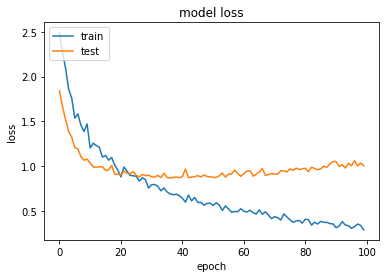

In [ ]:
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

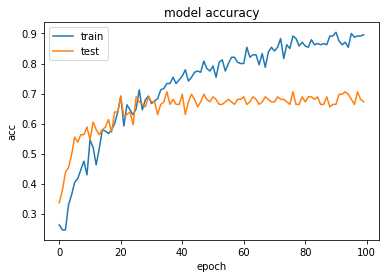

In [ ]:
plt.plot(cnnhistory.history['accuracy'])
plt.plot(cnnhistory.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#Predicciones con datos sin estandarizar
predictions = model.predict(x_testcnn)
classes_x = np.argmax(predictions,axis=1)
new_Ytest = y_test.astype(int)

In [ ]:
#Reporte datos sin estandarizar
from sklearn.metrics import classification_report
report = classification_report(new_Ytest, classes_x)
print(report)

              precision    recall  f1-score   support

           0       0.55      0.60      0.57        20
           1       0.53      0.56      0.55        16
           2       0.52      0.44      0.48        27
           3       0.77      0.85      0.81        27
           4       0.85      0.79      0.82        29

    accuracy                           0.66       119
   macro avg       0.64      0.65      0.65       119
weighted avg       0.66      0.66      0.66       119



In [ ]:
#Predicciones con datos estandarizados
predictions = model.predict(x_testcnn1)
classes_x = np.argmax(predictions,axis=1)
new_Ytest = y_tests.astype(int)

In [ ]:
#Reporte datos estandarizados
from sklearn.metrics import classification_report
report = classification_report(new_Ytest, classes_x)
print(report)

              precision    recall  f1-score   support

           0       0.50      0.70      0.58        20
           1       0.57      0.50      0.53        16
           2       0.60      0.44      0.51        27
           3       0.77      0.89      0.83        27
           4       0.85      0.76      0.80        29

    accuracy                           0.67       119
   macro avg       0.66      0.66      0.65       119
weighted avg       0.68      0.67      0.67       119



# TRANSFER LEARNING CON ESPECTOGRAMAS

In [ ]:
from keras.applications import vgg16 as vgg

In [ ]:
base_model = vgg.VGG16(weights='imagenet', 
                       include_top=False, 
                       input_shape=(100, 100, 3))

In [ ]:
# Extraemos capas hasta el 5to bloque
last = base_model.get_layer('block5_pool').output

In [ ]:
from keras.models import Model

In [ ]:
# añadimos capas de calasificacion
x = Flatten()(last)
pred = Dense(5, activation='softmax')(x)
model = Model(base_model.input, pred)

In [ ]:
#stop para que entrene aqui
for layer in base_model.layers:
     layer.trainable = False

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 100, 100, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)       0   

In [ ]:
cnnhistory=model.fit(img_gen, batch_size=16, epochs=50, validation_data=validation_generator)

Epoch 1/50
3/3 [==============================] - 44s 15s/step - loss: 1.9201 - accuracy: 0.1699 - val_loss: 1.6417 - val_accuracy: 0.2857
Epoch 2/50
3/3 [==============================] - 43s 15s/step - loss: 1.7177 - accuracy: 0.2368 - val_loss: 1.7468 - val_accuracy: 0.3286
Epoch 3/50
3/3 [==============================] - 43s 16s/step - loss: 1.6526 - accuracy: 0.3370 - val_loss: 1.5788 - val_accuracy: 0.3857
Epoch 4/50
3/3 [==============================] - 43s 15s/step - loss: 1.5292 - accuracy: 0.3816 - val_loss: 1.5049 - val_accuracy: 0.3286
Epoch 5/50
3/3 [==============================] - 43s 15s/step - loss: 1.4715 - accuracy: 0.2869 - val_loss: 1.4933 - val_accuracy: 0.3857
Epoch 6/50
3/3 [==============================] - 43s 15s/step - loss: 1.4125 - accuracy: 0.4930 - val_loss: 1.4645 - val_accuracy: 0.4143
Epoch 7/50
3/3 [==============================] - 42s 16s/step - loss: 1.3861 - accuracy: 0.4986 - val_loss: 1.4613 - val_accuracy: 0.3857
Epoch 8/50
3/3 [===========

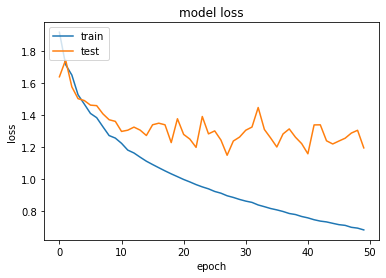

In [ ]:
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

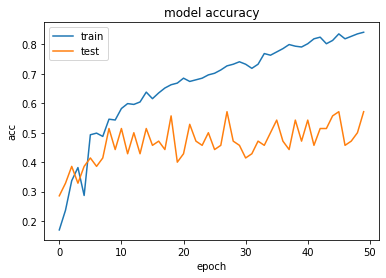

In [ ]:
plt.plot(cnnhistory.history['accuracy'])
plt.plot(cnnhistory.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#Predicciones con datos sin estandarizar
predictions = model.predict_generator(validation_generator)
predicted_classes = numpy.argmax(predictions, axis=1)
true_classes = validation_generator.classes
class_labels = list(validation_generator.class_indices.keys())   

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [ ]:
import sklearn.metrics as metrics
report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)  

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.33      0.10      0.15        10
           2       0.00      0.00      0.00        15
           3       0.33      0.25      0.29        16
           4       0.26      0.65      0.37        17

    accuracy                           0.23        70
   macro avg       0.18      0.20      0.16        70
weighted avg       0.19      0.23      0.18        70



PARA EVALUAR NUEVA FORMA DE SELECCIONAR LOS DATOS

In [ ]:
import glob
horse = glob.glob('full_dataset/horse/*.*')
donkey = glob.glob('full_dataset/donkey/*.*')
cow = glob.glob('full_dataset/cow/*.*')
zebra = glob.glob('full_dataset/zebra/*.*')

data = []
labels = []

for i in horse:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='RGB', 
    target_size= (280,280))
    image=np.array(image)
    data.append(image)
    labels.append(0)
for i in donkey:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='RGB', 
    target_size= (280,280))
    image=np.array(image)
    data.append(image)
    labels.append(1)
for i in cow:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='RGB', 
    target_size= (280,280))
    image=np.array(image)
    data.append(image)
    labels.append(2)
for i in zebra:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='RGB', 
    target_size= (280,280))
    image=np.array(image)
    data.append(image)
    labels.append(3)

data = np.array(data)
labels = np.array(labels)

from sklearn.model_selection import train_test_split
X_train, X_test, ytrain, ytest = train_test_split(data, labels, test_size=0.2,
                                                random_state=42)